IMPORTING LIBRARIES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

LOADING THE DATASET


In [21]:
df = pd.read_csv('../datasets/air_quality.csv')

print(df['City'].unique())
print(df.shape)
df.head()


['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
(29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


FILTERING FOR BENGALURU/BANGLORE

In [22]:
bengaluru_df = df[df['City'] == 'Bengaluru']

bengaluru_df.head()
print(bengaluru_df.shape)
bengaluru_df.isnull().sum()

(2009, 16)


City             0
Date             0
PM2.5          146
PM10           360
NO               6
NO2              6
NOx              4
NH3            203
CO              11
SO2              6
O3             144
Benzene        266
Toluene         93
Xylene        2009
AQI             99
AQI_Bucket      99
dtype: int64


PREPROCESSING THE DATA

In [23]:
#FIll the null values
bengaluru_df = bengaluru_df.ffill()

bengaluru_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN,NaN
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN,NaN
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN,NaN
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN,NaN


REMOVING OUTLIERS

In [24]:
# # Remove outliers using IQR method for key columns
# def remove_outliers_iqr(df, columns):
#     for col in columns:
#         if col in df.columns:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower = Q1 - 1.5 * IQR
#             upper = Q3 + 1.5 * IQR
#             df = df[(df[col] >= lower) & (df[col] <= upper)]
#     return df

# key_columns = ['PM2.5', 'PM10', 'AQI']
# bengaluru_df = remove_outliers_iqr(bengaluru_df, key_columns)
# print('Shape after outlier removal:', bengaluru_df.shape)


TRANSFORMING THE DATA

In [25]:
if 'Date' in bengaluru_df.columns:
    bengaluru_df['Date'] = pd.to_datetime(bengaluru_df['Date'], errors='coerce')
    bengaluru_df['Month'] = bengaluru_df['Date'].dt.month
    bengaluru_df['Year'] = bengaluru_df['Date'].dt.year

bengaluru_df.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
count,2009,2009,1931.000000,1699.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,0.0,1930.000000,1930,2009.000000,2009.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,Bengaluru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfactory,NaN,NaN
freq,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1139,NaN,NaN
mean,NaN,2017-10-01 00:00:00,35.331134,82.784603,9.394052,27.962992,19.687372,24.540567,1.841095,5.512882,33.331239,4.602703,4.690821,NaN,94.437306,NaN,6.249876,2017.272773
min,NaN,2015-01-01 00:00:00,1.720000,8.220000,0.460000,3.000000,0.000000,0.150000,0.000000,0.730000,1.830000,0.000000,0.000000,NaN,20.000000,NaN,1.000000,2015.000000
25%,NaN,2016-05-17 00:00:00,20.750000,56.550000,4.970000,18.740000,8.430000,14.230000,0.720000,3.730000,18.210000,0.440000,1.140000,NaN,67.000000,NaN,3.000000,2016.000000
50%,NaN,2017-10-01 00:00:00,30.260000,76.680000,7.520000,26.910000,19.100000,21.020000,0.920000,5.020000,31.550000,0.870000,1.760000,NaN,86.000000,NaN,6.000000,2017.000000
75%,NaN,2019-02-15 00:00:00,43.780000,103.510000,11.660000,34.150000,28.530000,27.920000,1.170000,6.460000,45.420000,1.960000,3.150000,NaN,111.000000,NaN,9.000000,2019.000000
max,NaN,2020-07-01 00:00:00,313.590000,351.510000,95.190000,142.350000,147.060000,120.070000,48.070000,92.660000,157.200000,307.420000,411.520000,NaN,352.000000,NaN,12.000000,2020.000000


LABEL ENCODING FOR AQI_BUCKET


In [26]:
if 'AQI_Bucket' in bengaluru_df.columns:
    # Fill missing values with "Missing"
    bengaluru_df['AQI_Bucket'] = bengaluru_df['AQI_Bucket'].fillna('Missing')

    # Mapping categories (including Missing)
    aqi_mapping = {
        'Good': 0,
        'Satisfactory': 1,
        'Moderate': 2,
        'Poor': 3,
        'Very Poor': 4,
        'Missing': -1  # Special code for missing values
    }
    bengaluru_df['AQI_Bucket_encoded'] = bengaluru_df['AQI_Bucket'].map(aqi_mapping)

    print("Missing values filled with 'Missing' and AQI_Bucket mapped successfully.")
else:
    print("AQI_Bucket column not found.")


Missing values filled with 'Missing' and AQI_Bucket mapped successfully.


BASIC VISUALIZATIONS

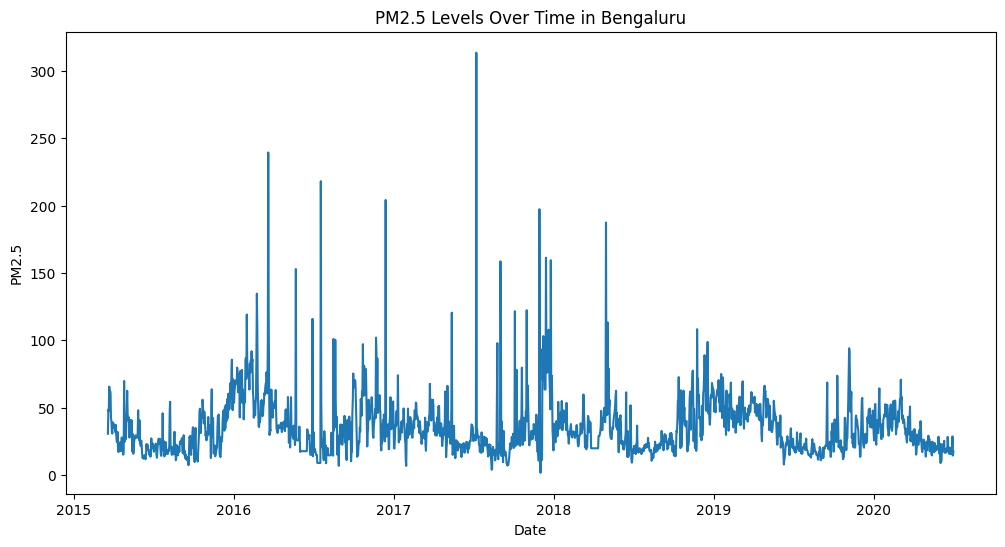

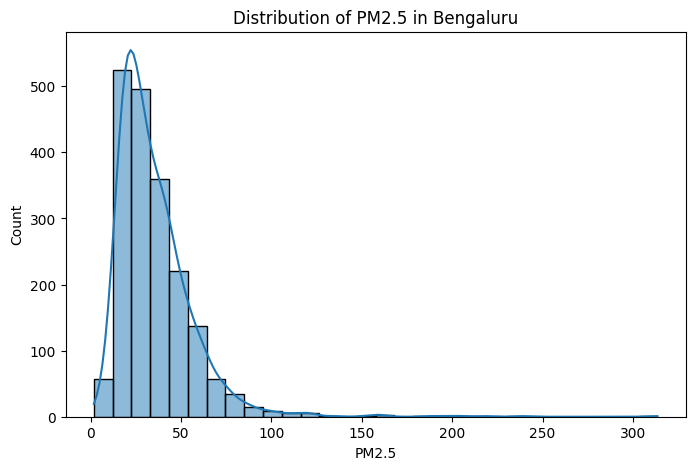

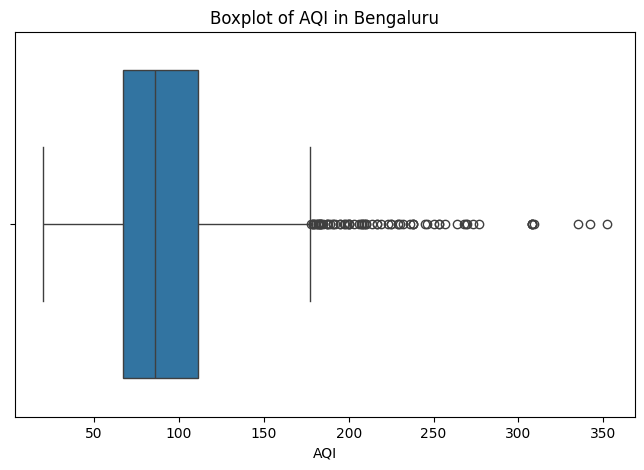

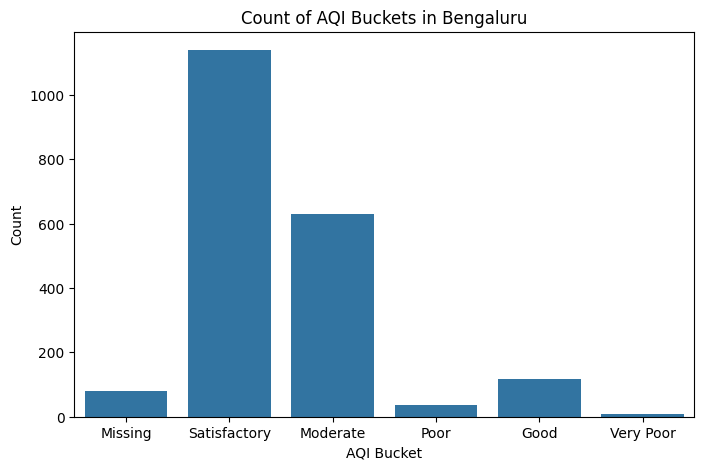

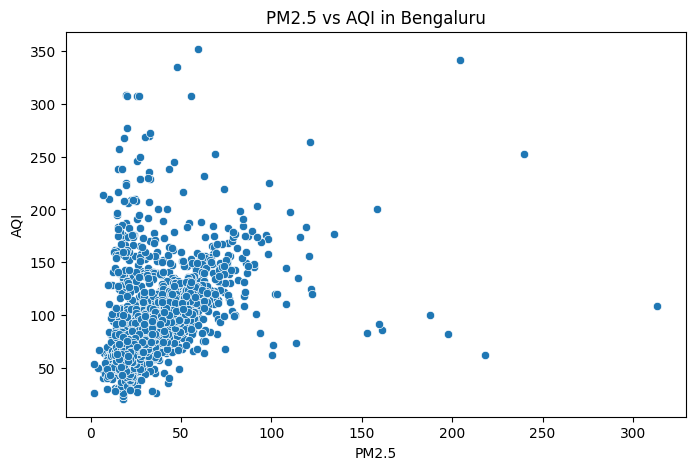

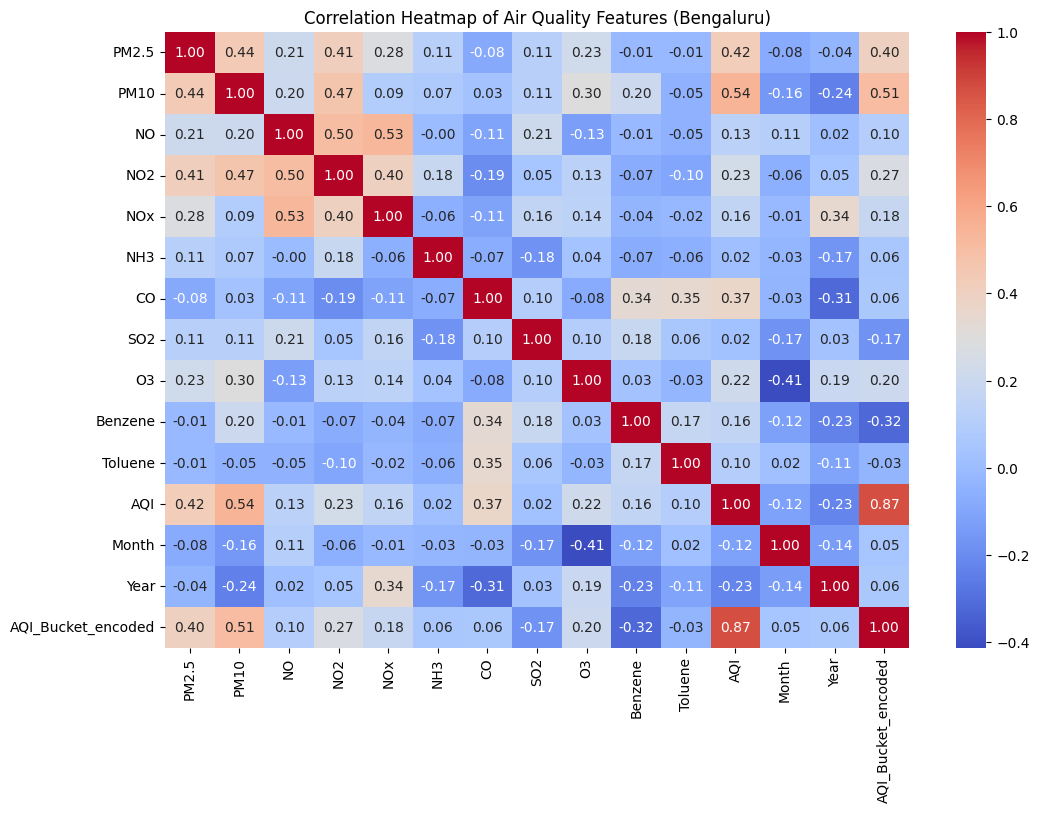

In [27]:

if 'Date' in bengaluru_df.columns and 'PM2.5' in bengaluru_df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(bengaluru_df['Date'], bengaluru_df['PM2.5'])
    plt.title('PM2.5 Levels Over Time in Bengaluru')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.show()

if 'PM2.5' in bengaluru_df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(bengaluru_df['PM2.5'], bins=30, kde=True)
    plt.title('Distribution of PM2.5 in Bengaluru')
    plt.xlabel('PM2.5')
    plt.show()
    
if 'AQI' in bengaluru_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=bengaluru_df['AQI'])
    plt.title('Boxplot of AQI in Bengaluru')
    plt.xlabel('AQI')
    plt.show()
    
if 'AQI_Bucket' in bengaluru_df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=bengaluru_df['AQI_Bucket'])
    plt.title('Count of AQI Buckets in Bengaluru')
    plt.xlabel('AQI Bucket')
    plt.ylabel('Count')
    plt.show()

if 'PM2.5' in bengaluru_df.columns and 'AQI' in bengaluru_df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=bengaluru_df['PM2.5'], y=bengaluru_df['AQI'])
    plt.title('PM2.5 vs AQI in Bengaluru')
    plt.xlabel('PM2.5')
    plt.ylabel('AQI')
    plt.show()

# Plot correlation heatmap if there are at least 2 numeric columns with non-null values
numeric_cols = bengaluru_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all').columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(12,8))
    corr = bengaluru_df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Air Quality Features (Bengaluru)')
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')

SAVING THE FILE

In [28]:
output_path = '../preprocessed_data/bangalore/air_quality_bengaluru.csv'
bengaluru_df.to_csv(output_path, index=False)
print(f'Preprocessed Bengaluru air quality data saved to {output_path}')

Preprocessed Bengaluru air quality data saved to ../preprocessed_data/bangalore/air_quality_bengaluru.csv
